In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
import experiments

curves = 6
curve_labels_small = ['1/4x Unreg $\\rightarrow$ Unreg', '1/4x Unreg $\\rightarrow$ Allreg', 
                      '1/4x Unreg $\\rightarrow$ Rand', '1/4x Allreg $\\rightarrow$ Unreg', 
                      '1/4x Allreg $\\rightarrow$ Allreg', '1/4x Allreg $\\rightarrow$ Rand']
curve_labels_large = ['4x Unreg $\\rightarrow$ Unreg', '4x Unreg $\\rightarrow$ Allreg', 
                      '4x Unreg $\\rightarrow$ Rand', '4x Allreg $\\rightarrow$ Unreg', 
                      '4x Allreg $\\rightarrow$ Allreg', '4x Allreg $\\rightarrow$ Rand']
curve_colors = ['blue', 'limegreen', 'red', 'lightblue', 'lightgreen', 'salmon']
sizes = 5
size_factors = [0.25, 0.5, 1, 2, 4]
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
num_layers = 4
layers = [1, 2, 3, 4]

results_pkl = '/om/user/scasper/workspace/models/replication/mappability.pkl'

# both of these will be indexed [cluster/proj][size][unreg/allreg/random][layer]
with open(results_pkl, 'rb') as f:
    results = pickle.load(f)
    
# results indexed [net][measure][size][unreg\allreg\random][layer]

# index of first dimension:
# 0: small_unreg net, ID62
# 1: small_allreg net, ID67
# 2: large_unreg net, ID86
# 3: large_allreg net, ID91

# index of second dimension:
# 0: cluster mean loss
# 1: cluster std loss
# 2: best_r mean
# 3: best_r std
# 4: ssp mean loss
# 5: ssp std loss
# 6: cca r^2 (which is not analogous to the pearson r^2)

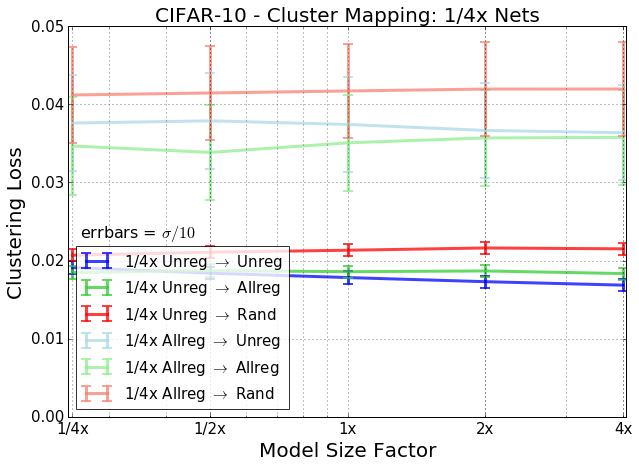

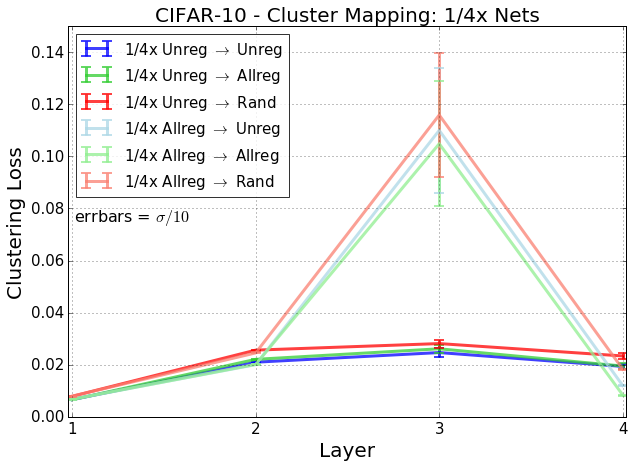

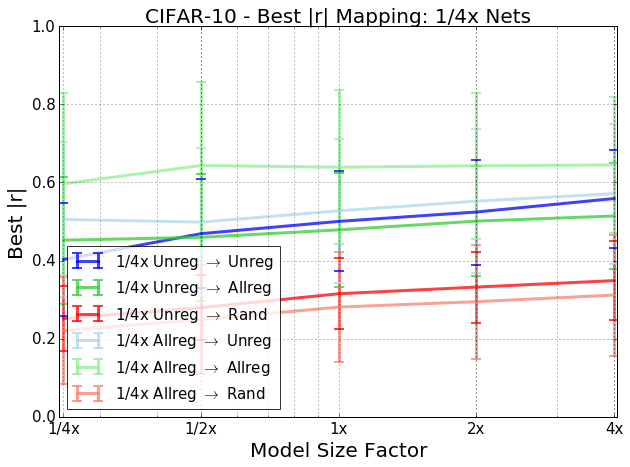

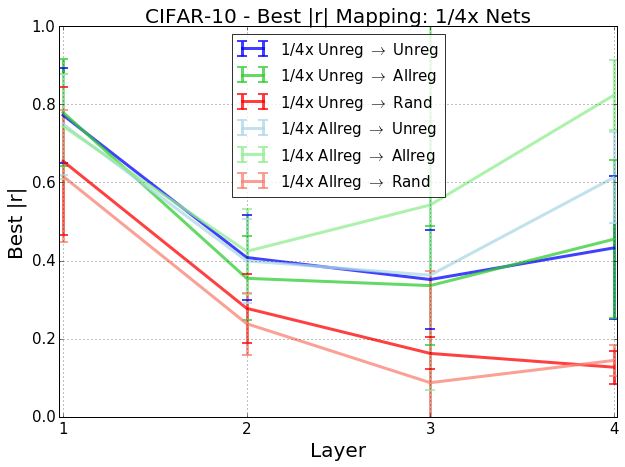

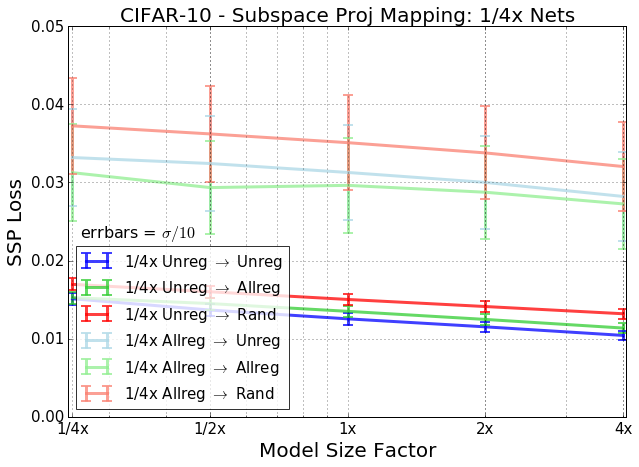

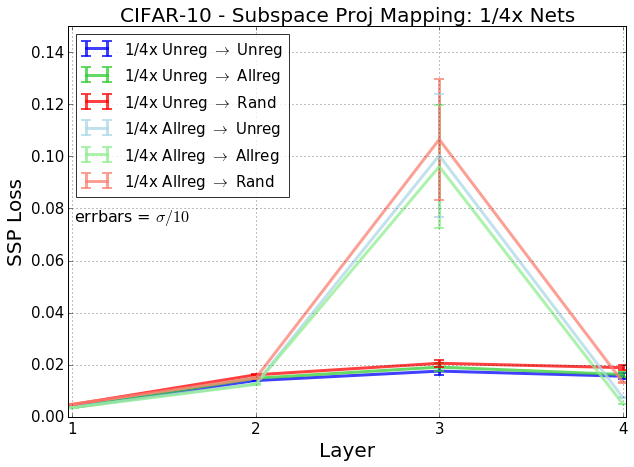

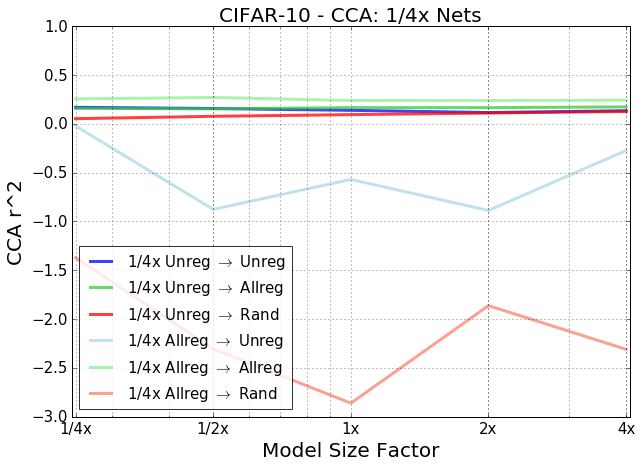

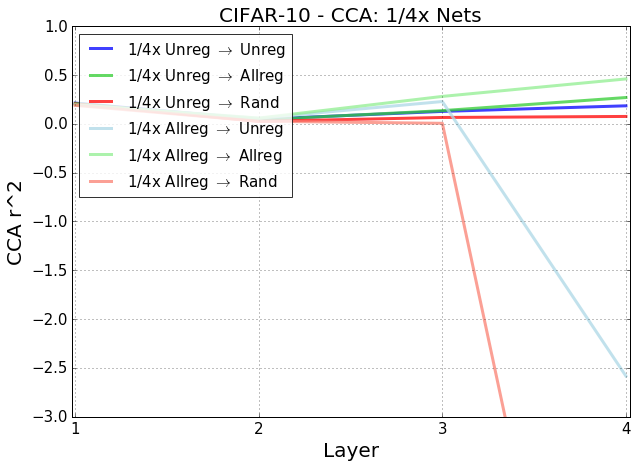

In [43]:
# small nets results

% matplotlib inline

######################################################################
# clustering, sizewise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Cluster Mapping: 1/4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('Clustering Loss', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((0, 0.05))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2):
    for onto_reg in range(3):
        sizewise_results = np.mean(results, axis=4)  # average across layers
        curve_idx = 3 * net_id + onto_reg
        plt.errorbar(size_factors, sizewise_results[net_id, 0, :, onto_reg], 
                     yerr=sizewise_results[net_id, 1, :, onto_reg]/10, color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_small, loc='lower left', framealpha=0.8, fontsize=15)
plt.text(0.26, 0.023, 'errbars = $\sigma/10$', fontsize=16)
plt.show()

######################################################################
# clustering, layerwise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Cluster Mapping: 1/4x Nets', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.ylabel('Clustering Loss', fontsize=20)
plt.xlim((0.98, num_layers+0.02))
plt.ylim((0, 0.15))
plt.grid(True, which='both', c='black')
plt.xticks(layers, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2):
    for onto_reg in range(3):
        layerwise_results = np.mean(results, axis=2)  # average across sizes
        curve_idx = 3 * net_id + onto_reg
        plt.errorbar(layers, layerwise_results[net_id, 0, onto_reg, :], 
                     yerr=layerwise_results[net_id, 1, onto_reg, :]/10, color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_small, loc='upper left', framealpha=0.8, fontsize=15)
plt.text(1.01, 0.075, 'errbars = $\sigma/10$', fontsize=16)
plt.show()

######################################################################
# best_r, sizewise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Best |r| Mapping: 1/4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('Best |r|', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((0, 1))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2):
    for onto_reg in range(3):
        sizewise_results = np.mean(results, axis=4)  # average across layers
        curve_idx = 3 * net_id + onto_reg
        plt.errorbar(size_factors, sizewise_results[net_id, 2, :, onto_reg], 
                     yerr=sizewise_results[net_id, 3, :, onto_reg], color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_small, loc='lower left', framealpha=0.8, fontsize=15)
plt.show()

######################################################################
# best_r, layerwise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Best |r| Mapping: 1/4x Nets', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.ylabel('Best |r|', fontsize=20)
plt.xlim((0.98, num_layers+0.02))
plt.ylim((0, 1))
plt.grid(True, which='both', c='black')
plt.xticks(layers, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2):
    for onto_reg in range(3):
        layerwise_results = np.mean(results, axis=2)  # average across sizes
        curve_idx = 3 * net_id + onto_reg
        plt.errorbar(layers, layerwise_results[net_id, 2, onto_reg, :], 
                     yerr=layerwise_results[net_id, 3, onto_reg, :], color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_small, loc='upper center', framealpha=0.8, fontsize=15)
plt.show()

######################################################################
# ssp, sizewise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Subspace Proj Mapping: 1/4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('SSP Loss', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((0, 0.05))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2):
    for onto_reg in range(3):
        sizewise_results = np.mean(results, axis=4)  # average across layers
        curve_idx = 3 * net_id + onto_reg
        plt.errorbar(size_factors, sizewise_results[net_id, 4, :, onto_reg], 
                     yerr=sizewise_results[net_id, 5, :, onto_reg]/10, color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_small, loc='lower left', framealpha=0.8, fontsize=15)
plt.text(0.26, 0.023, 'errbars = $\sigma/10$', fontsize=16)
plt.show()

######################################################################
# ssp, layerwise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Subspace Proj Mapping: 1/4x Nets', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.ylabel('SSP Loss', fontsize=20)
plt.xlim((0.98, num_layers+0.02))
plt.ylim((0, 0.15))
plt.grid(True, which='both', c='black')
plt.xticks(layers, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2):
    for onto_reg in range(3):
        layerwise_results = np.mean(results, axis=2)  # average across sizes
        curve_idx = 3 * net_id + onto_reg
        plt.errorbar(layers, layerwise_results[net_id, 4, onto_reg, :], 
                     yerr=layerwise_results[net_id, 5, onto_reg, :]/10, color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_small, loc='upper left', framealpha=0.8, fontsize=15)
plt.text(1.01, 0.075, 'errbars = $\sigma/10$', fontsize=16)
plt.show()

######################################################################
# cca, sizewise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - CCA: 1/4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('CCA r^2', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((-3, 1))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2):
    for onto_reg in range(3):
        sizewise_results = np.mean(results, axis=4)  # average across layers
        curve_idx = 3 * net_id + onto_reg
        plt.plot(size_factors, sizewise_results[net_id, 6, :, onto_reg], 
                 color=curve_colors[curve_idx], 
                 linestyle='-', linewidth=3, alpha=0.75)
plt.legend(curve_labels_small, loc='lower left', framealpha=0.8, fontsize=15)
# plt.text(0.26, 0.016, 'errbars = $\sigma/10$', fontsize=16)
plt.show()

######################################################################
# cca, layerwise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - CCA: 1/4x Nets', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.ylabel('CCA r^2', fontsize=20)
plt.xlim((0.98, num_layers+0.02))
plt.ylim((-3, 1))
plt.grid(True, which='both', c='black')
plt.xticks(layers, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2):
    for onto_reg in range(3):
        layerwise_results = np.mean(results, axis=2)  # average across sizes
        curve_idx = 3 * net_id + onto_reg
        plt.plot(layers, layerwise_results[net_id, 6, onto_reg, :], 
                 color=curve_colors[curve_idx], 
                 linestyle='-', linewidth=3, alpha=0.75)
plt.legend(curve_labels_small, loc='upper left', framealpha=0.8, fontsize=15)
# plt.text(0.26, 0.016, 'errbars = $\sigma/10$', fontsize=16)
plt.show()


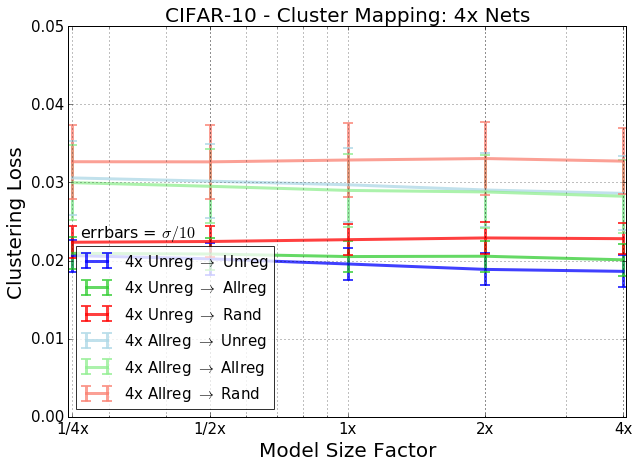

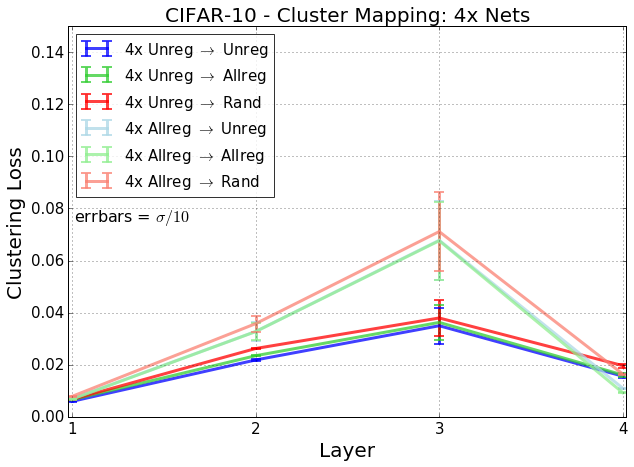

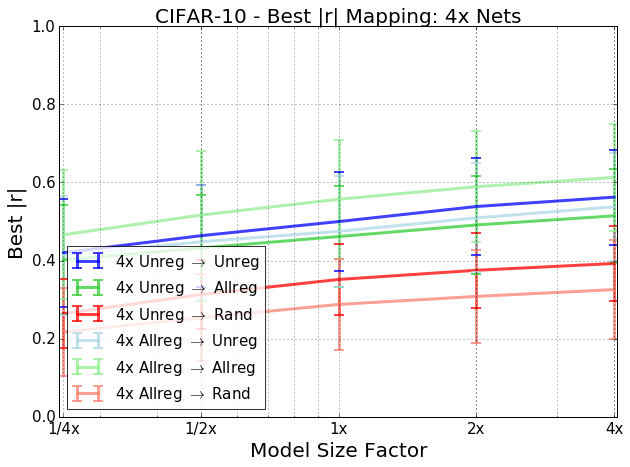

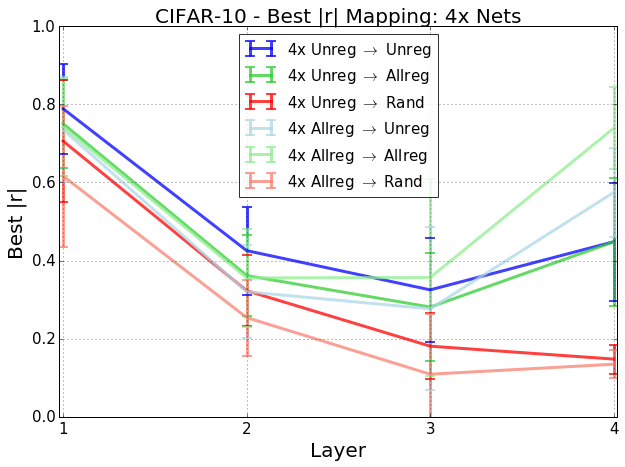

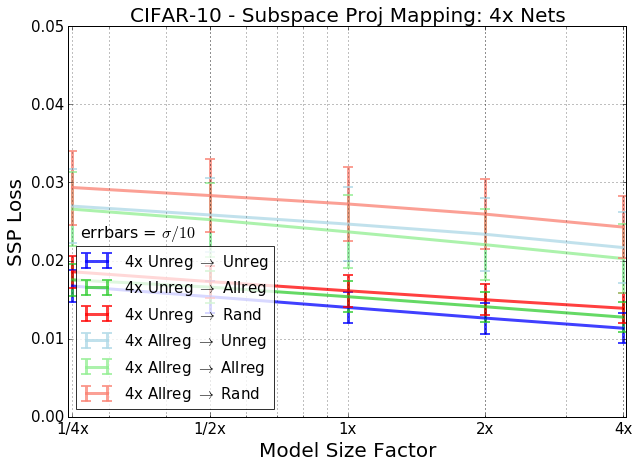

In [ ]:
# large net results

######################################################################
# clustering, sizewise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Cluster Mapping: 4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('Clustering Loss', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((0, 0.05))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2, 4):
    for onto_reg in range(3):
        sizewise_results = np.mean(results, axis=4)  # average across layers
        curve_idx = 3 * (net_id-2) + onto_reg
        plt.errorbar(size_factors, sizewise_results[net_id, 0, :, onto_reg], 
                     yerr=sizewise_results[net_id, 1, :, onto_reg]/10, color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_large, loc='lower left', framealpha=0.8, fontsize=15)
plt.text(0.26, 0.023, 'errbars = $\sigma/10$', fontsize=16)
plt.show()

######################################################################
# clustering, layerwise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Cluster Mapping: 4x Nets', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.ylabel('Clustering Loss', fontsize=20)
plt.xlim((0.98, num_layers+0.02))
plt.ylim((0, 0.15))
plt.grid(True, which='both', c='black')
plt.xticks(layers, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2, 4):
    for onto_reg in range(3):
        layerwise_results = np.mean(results, axis=2)  # average across sizes
        curve_idx = 3 * (net_id-2) + onto_reg
        plt.errorbar(layers, layerwise_results[net_id, 0, onto_reg, :], 
                     yerr=layerwise_results[net_id, 1, onto_reg, :]/10, color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_large, loc='upper left', framealpha=0.8, fontsize=15)
plt.text(1.01, 0.075, 'errbars = $\sigma/10$', fontsize=16)
plt.show()

######################################################################
# best_r, sizewise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Best |r| Mapping: 4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('Best |r|', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((0, 1))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2, 4):
    for onto_reg in range(3):
        sizewise_results = np.mean(results, axis=4)  # average across layers
        curve_idx = 3 * (net_id-2) + onto_reg
        plt.errorbar(size_factors, sizewise_results[net_id, 2, :, onto_reg], 
                     yerr=sizewise_results[net_id, 3, :, onto_reg], color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_large, loc='lower left', framealpha=0.8, fontsize=15)
plt.show()

######################################################################
# best_r, layerwise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Best |r| Mapping: 4x Nets', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.ylabel('Best |r|', fontsize=20)
plt.xlim((0.98, num_layers+0.02))
plt.ylim((0, 1))
plt.grid(True, which='both', c='black')
plt.xticks(layers, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2, 4):
    for onto_reg in range(3):
        layerwise_results = np.mean(results, axis=2)  # average across sizes
        curve_idx = 3 * (net_id-2) + onto_reg
        plt.errorbar(layers, layerwise_results[net_id, 2, onto_reg, :], 
                     yerr=layerwise_results[net_id, 3, onto_reg, :], color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_large, loc='upper center', framealpha=0.8, fontsize=15)
plt.show()

######################################################################
# ssp, sizewise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Subspace Proj Mapping: 4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('SSP Loss', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((0, 0.05))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2, 4):
    for onto_reg in range(3):
        sizewise_results = np.mean(results, axis=4)  # average across layers
        curve_idx = 3 * (net_id-2) + onto_reg
        plt.errorbar(size_factors, sizewise_results[net_id, 4, :, onto_reg], 
                     yerr=sizewise_results[net_id, 5, :, onto_reg]/10, color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_large, loc='lower left', framealpha=0.8, fontsize=15)
plt.text(0.26, 0.023, 'errbars = $\sigma/10$', fontsize=16)
plt.show()

######################################################################
# ssp, layerwise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Subspace Proj Mapping: 4x Nets', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.ylabel('SSP Loss', fontsize=20)
plt.xlim((0.98, num_layers+0.02))
plt.ylim((0, 0.15))
plt.grid(True, which='both', c='black')
plt.xticks(layers, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2, 4):
    for onto_reg in range(3):
        layerwise_results = np.mean(results, axis=2)  # average across sizes
        curve_idx = 3 * (net_id-2) + onto_reg
        plt.errorbar(layers, layerwise_results[net_id, 4, onto_reg, :], 
                     yerr=layerwise_results[net_id, 5, onto_reg, :]/10, color=curve_colors[curve_idx], 
                     linestyle='-', linewidth=3, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels_large, loc='upper left', framealpha=0.8, fontsize=15)
plt.text(1.01, 0.075, 'errbars = $\sigma/10$', fontsize=16)
plt.show()

######################################################################
# cca, sizewise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - CCA: 4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('CCA r^2', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((-3, 1))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2, 4):
    for onto_reg in range(3):
        sizewise_results = np.mean(results, axis=4)  # average across layers
        curve_idx = 3 * (net_id-2) + onto_reg
        plt.plot(size_factors, sizewise_results[net_id, 6, :, onto_reg], 
                 color=curve_colors[curve_idx], 
                 linestyle='-', linewidth=3, alpha=0.75)
plt.legend(curve_labels_large, loc='lower left', framealpha=0.8, fontsize=15)
plt.show()

######################################################################
# cca, layerwise
    
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - CCA: 4x Nets', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.ylabel('CCA r^2', fontsize=20)
plt.xlim((0.98, num_layers+0.02))
plt.ylim((-3, 1))
plt.grid(True, which='both', c='black')
plt.xticks(layers, fontsize=15)
plt.yticks(fontsize=15)

for net_id in range(2, 4):
    for onto_reg in range(3):
        layerwise_results = np.mean(results, axis=2)  # average sacross sizes
        curve_idx = 3 * (net_id-2) + onto_reg
        plt.plot(layers, layerwise_results[net_id, 6, onto_reg, :], 
                 color=curve_colors[curve_idx], 
                 linestyle='-', linewidth=3, alpha=0.75)
plt.legend(curve_labels_large, loc='upper left', framealpha=0.8, fontsize=15)
plt.show()
